In [1]:
import sys
import json
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import pickle
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from textblob import TextBlob
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
df = pd.read_json(r'C:\Users\Usman\Desktop\Project\bjp.json', lines=True)

In [4]:
text = []

for x in df['full_text']:
    text.append(x)
    
time = []

for x in df['created_at']:
    time.append(x)

In [5]:
sentiment = []
pos_tweet = 0
neg_tweet = 0
neu_tweet = 0
for x in text:
    blob = TextBlob(x)
    pol = blob.sentiment.polarity
    if pol < 0:
        sentiment.append('Negative')
        neg_tweet = neg_tweet + 1
    elif pol == 0:
        sentiment.append('Neutral')
        neu_tweet = neu_tweet + 1
    else:
        sentiment.append('Positive')
        pos_tweet = pos_tweet + 1
        

In [6]:
data = {'Text': text, 
        'Sentiment': sentiment,
        'Created at': pd.to_datetime(time)}
        
Text_Time_Sentiment = pd.DataFrame(data)
Text_Time_Sentiment['Created at'] = pd.to_datetime(Text_Time_Sentiment['Created at'])

In [7]:
Text_Time_Sentiment.head()

,Text,Sentiment,Created at
0,It's always better to give ticket to popular f...,Positive,2019-05-04 11:02:28
1,"RT @Aagan86: Manjul Krishna Thakur, father of ...",Neutral,2019-05-04 11:02:27
2,Congress helping #BJP by dividing secular vote...,Neutral,2019-05-04 10:58:22
3,RT @abpnewstv: #BJP 'imported' Hans Raj Hans a...,Neutral,2019-05-04 10:58:21
4,#BIGNEWS: #BJP President @AmitShah says the ma...,Positive,2019-05-04 10:58:19


In [8]:
Text_Time_Sentiment['Created at'].dt.strftime('%d')[:5]

0    04
1    04
2    04
3    04
4    04
Name: Created at, dtype: object

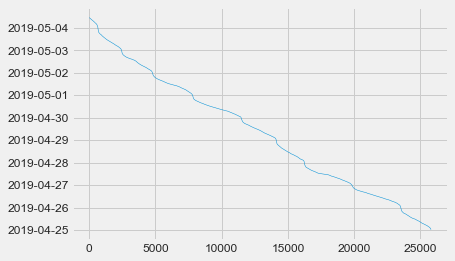

In [9]:
Text_Time_Sentiment['Created at'].plot(linewidth=0.5)

In [10]:
Text_Time_Sentiment.head()

,Text,Sentiment,Created at
0,It's always better to give ticket to popular f...,Positive,2019-05-04 11:02:28
1,"RT @Aagan86: Manjul Krishna Thakur, father of ...",Neutral,2019-05-04 11:02:27
2,Congress helping #BJP by dividing secular vote...,Neutral,2019-05-04 10:58:22
3,RT @abpnewstv: #BJP 'imported' Hans Raj Hans a...,Neutral,2019-05-04 10:58:21
4,#BIGNEWS: #BJP President @AmitShah says the ma...,Positive,2019-05-04 10:58:19


In [11]:
dict = {}
list_of_dates = []
list_of_count = []
count_of_positive = []
count_of_negative = []

for x in range(len(Text_Time_Sentiment)):
    if Text_Time_Sentiment['Created at'][x].strftime('%d/%m/%y') not in list_of_dates:
        list_of_dates.append(Text_Time_Sentiment['Created at'][x].strftime('%d/%m/%y'))
        list_of_count.append(0)
        count_of_negative.append(0)
        count_of_positive.append(0)
        
    for z in range(len(list_of_count)):
        if Text_Time_Sentiment['Created at'][x].strftime('%d/%m/%y') == list_of_dates[z]:
            list_of_count[z] = list_of_count[z] + 1
            if Text_Time_Sentiment['Sentiment'][x] == 'Positive':
                count_of_positive[z] = count_of_positive[z] + 1
            elif Text_Time_Sentiment['Sentiment'][x] == 'Negative':
                count_of_negative[z] = count_of_negative[z] + 1
            
dict = {
        'Created at':list_of_dates,
        'Count':list_of_count,
        'Negative Tweets':count_of_negative,
        'Positive Tweets':count_of_positive
    }
dict['Created at'] = pd.to_datetime(dict['Created at'])

print(len(list_of_dates),len(list_of_count),len(count_of_negative),len(count_of_positive))
    

10 10 10 10


In [12]:
Dates_with_Count = pd.DataFrame(dict)

In [13]:
Dates_with_Count.head()

,Created at,Count,Negative Tweets,Positive Tweets
0,2019-04-05,651,107,186
1,2019-03-05,1791,301,680
2,2019-02-05,2332,271,1091
3,2019-01-05,3030,831,700
4,2019-04-30,3666,1538,1087


Text(0.5, 1.0, 'Time Series Analysis of Sentiment')

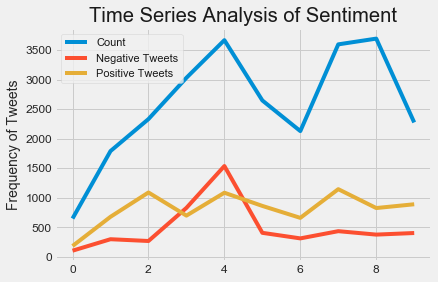

In [14]:
cols_plot = ['Count','Negative Tweets','Positive Tweets']
axes = Dates_with_Count[cols_plot].plot()
axes.set_ylabel('Frequency of Tweets')
axes.set_title('Time Series Analysis of Sentiment')